# Title :- Prediction using Decision Tree Algorithm

# Submitted by :- VISHAL AGRAHARI

# 1.Acquiring the dataset 

In [1]:
import pandas as pd
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Data preprocessing :-

Checking for Null Values :-

In [2]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Removing not so useful column Id as it just a index number :-

In [3]:
df=df.drop('Id',axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Coverting the Categorical values into numerical :-

In [4]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [5]:
df.loc[df['Species']=='Iris-versicolor','Species']=0
df.loc[df['Species']=='Iris-setosa','Species']=1
df.loc[df['Species']=='Iris-virginica','Species']=2
df.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
70,5.9,3.2,4.8,1.8,0
12,4.8,3.0,1.4,0.1,1
35,5.0,3.2,1.2,0.2,1
107,7.3,2.9,6.3,1.8,2
3,4.6,3.1,1.5,0.2,1
38,4.4,3.0,1.3,0.2,1
98,5.1,2.5,3.0,1.1,0
106,4.9,2.5,4.5,1.7,2
19,5.1,3.8,1.5,0.3,1
124,6.7,3.3,5.7,2.1,2


# Dividing the Data into Features and Target :-

In [6]:
X=df.drop('Species',axis=1)
y=df['Species']
y=y.astype('int')

# Splitting the Data :-

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

Normalizng the data :-

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Training the Model using "Decision Tree Algorithm" :-

In [9]:
from sklearn.tree import DecisionTreeClassifier
my_model=DecisionTreeClassifier(random_state=10)
result=my_model.fit(X_train,y_train)

# Testing th Model :-

In [10]:
pred=result.predict(X_test)
pred

array([1, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 2, 1, 0,
       2, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1])

# Cheching Accuracy :- 

In [11]:
from sklearn.metrics import accuracy_score
print("The accuracy achieved is :- ",100*accuracy_score(y_test,pred),'%')

The accuracy achieved is :-  97.77777777777777 %


# Deploying the Model :-

In [12]:
new3=result.predict([[5.9,3.0,5.1,1.8]])
new3

array([2])

# Visualizing the Decision Tree :-

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree

[Text(334.8, 504.7714285714286, 'X[3] <= -0.622\ngini = 0.663\nsamples = 105\nvalue = [36, 30, 39]'),
 Text(251.10000000000002, 427.11428571428576, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(418.5, 427.11428571428576, 'X[2] <= 0.516\ngini = 0.499\nsamples = 75\nvalue = [36, 0, 39]'),
 Text(167.4, 349.4571428571429, 'X[3] <= 0.495\ngini = 0.105\nsamples = 36\nvalue = [34, 0, 2]'),
 Text(83.7, 271.8, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(251.10000000000002, 271.8, 'X[1] <= 0.159\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 2]'),
 Text(167.4, 194.14285714285717, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(334.8, 194.14285714285717, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(669.6, 349.4571428571429, 'X[3] <= 0.56\ngini = 0.097\nsamples = 39\nvalue = [2, 0, 37]'),
 Text(585.9, 271.8, 'X[1] <= 0.034\ngini = 0.444\nsamples = 6\nvalue = [2, 0, 4]'),
 Text(502.20000000000005, 194.14285714285717, 'X[3] <= 0.363\ngini = 0.32\nsamples = 5\nvalue = [1,

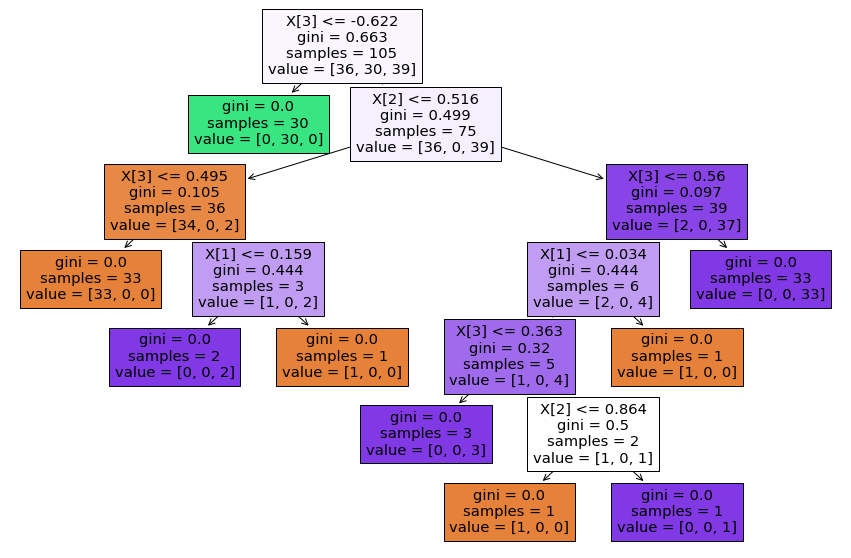

In [14]:
plt.figure(figsize=(15,10))
tree.plot_tree(my_model,filled=True)